## **EJERCICIO 1**

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_1 = pd.read_csv('str_1.csv', delimiter=';')
df_2 = pd.read_csv('str_2.csv', delimiter=';')

df = pd.concat([df_1, df_2], ignore_index=True)

Exploración inicial del dataset

In [110]:
# Mostrar las primeras filas de los datos combinados
df.head()

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [111]:
print('Tipos de datos y nulos')
print(df.info())

Tipos de datos y nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9537 non-null   int64  
 1   protocol             9537 non-null   object 
 2   browser_type         9537 non-null   object 
 3   login_attempts       9409 non-null   float64
 4   duration             9537 non-null   float64
 5   packet_size          9537 non-null   int64  
 6   encryption_used      7571 non-null   object 
 7   ip_reputation_score  9537 non-null   float64
 8   failed_logins        9537 non-null   int64  
 9   unusual_time_access  9537 non-null   int64  
 10  attack               9537 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 819.7+ KB
None


In [112]:
print('Medidas estadísticas')
print(df.describe())

Medidas estadísticas
                ID  login_attempts     duration  packet_size  \
count  9537.000000     9409.000000  9537.000000  9537.000000   
mean   3124.823949        4.029971   792.745312   500.430639   
std    2209.075559        1.962595   786.560144   198.379364   
min       0.000000        1.000000     0.500000    64.000000   
25%    1192.000000        3.000000   231.953006   365.000000   
50%    2658.000000        4.000000   556.277457   499.000000   
75%    5042.000000        5.000000  1105.380602   635.000000   
max    7426.000000       13.000000  7190.392213  1285.000000   

       ip_reputation_score  failed_logins  unusual_time_access  
count          9537.000000    9537.000000          9537.000000  
mean              0.331338       1.517773             0.149942  
std               0.177175       1.033988             0.357034  
min               0.002497       0.000000             0.000000  
25%               0.191946       1.000000             0.000000  
50%         

In [113]:
print('Conteo de valores nulos')
print(df.isnull().sum())

Conteo de valores nulos
ID                        0
protocol                  0
browser_type              0
login_attempts          128
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64


Visualización gráfica de las variables
- Protocolo de comunicación
- Navegador utilizado
- Intentos de login
- Duración de la conexión (Segundos)
- Protocolo de encriptación
- Confiabilidad del IP (de 0 a 1)
- Intentos fallidos de login
- Horario inusual (0 o 1)
- Detección de ataque (0 o 1)

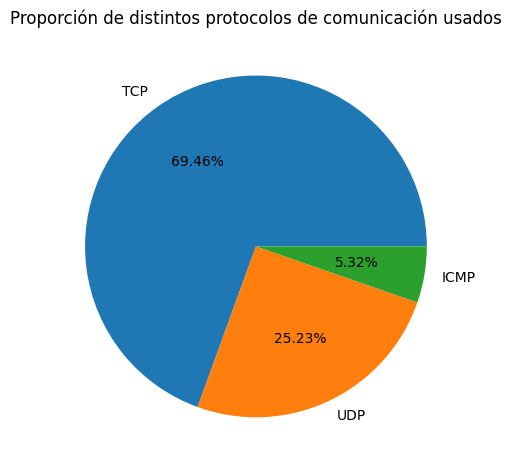

In [114]:
# Protocolo de comunicación
plt.pie(df.protocol.value_counts(), labels=df.protocol.unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos protocolos de comunicación usados')

plt.tight_layout()
plt.show()

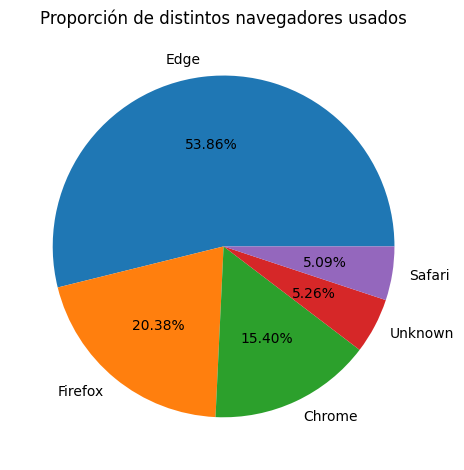

In [115]:
# Navegador
plt.pie(df.browser_type.value_counts(), labels=df.browser_type.unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos navegadores usados')

plt.tight_layout()
plt.show()

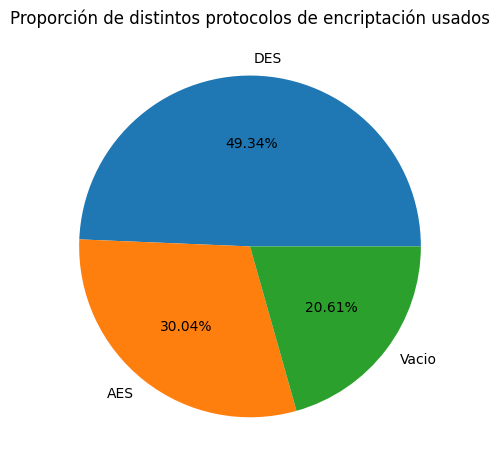

In [116]:
# Protocolo de encriptación
df_encryption_used = df['encryption_used'][:]
df_encryption_used.fillna('Vacio', inplace=True)

plt.pie(df_encryption_used.value_counts(), labels=df_encryption_used.unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos protocolos de encriptación usados')

plt.tight_layout()
plt.show()

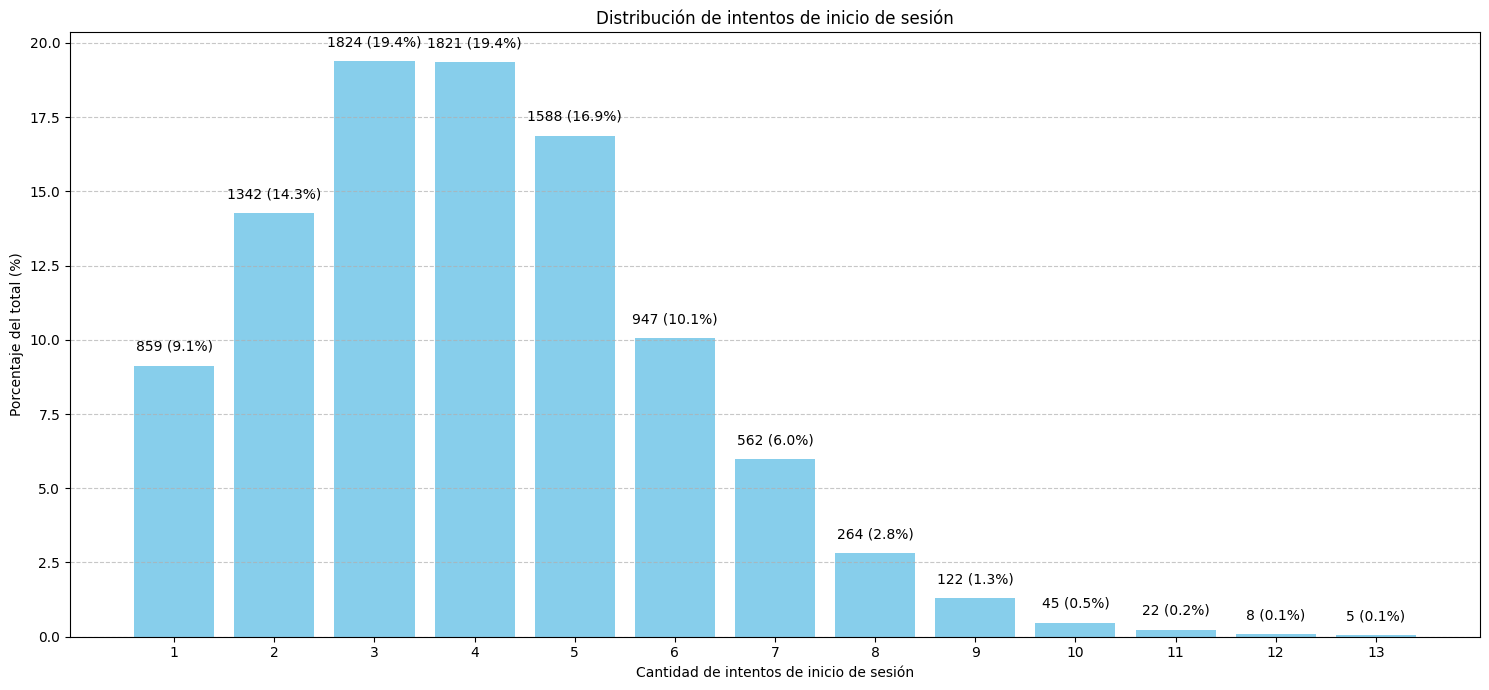

In [117]:
# Intentos de login

# Contar los intentos de inicio de sesión
login_counts_total = df['login_attempts'].value_counts()  # Cantidad total de intentos
login_counts_percent = (login_counts_total / login_counts_total.sum()) * 100  # Convertir a porcentaje

# Crear el gráfico de barras
plt.figure(figsize=(15, 7))
plt.bar(login_counts_total.index, login_counts_percent, color='skyblue')

# Etiquetas y título
plt.xlabel('Cantidad de intentos de inicio de sesión')
plt.ylabel('Porcentaje del total (%)')
plt.title('Distribución de intentos de inicio de sesión')

# Mostrar los valores sobre las barras (total y porcentaje)
for i, v in enumerate(login_counts_total.index):
    total = login_counts_total[v]
    percent = login_counts_percent[v]
    plt.text(v, percent + 0.5, f"{total} ({percent:.1f}%)", ha='center', fontsize=10)

# Configurar el eje X para que vaya de 1 en 1
plt.xticks(range(int(min(login_counts_total.index)), int(max(login_counts_total.index)) + 1, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de guía en el eje Y

# Mostrar el gráfico
plt.tight_layout()
plt.show() 

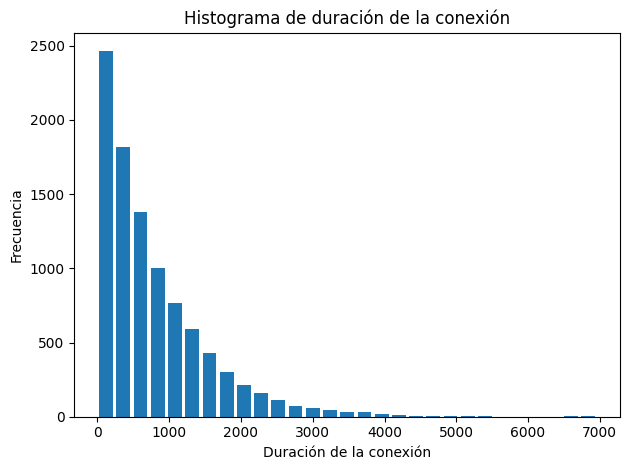

In [118]:
# Duración de la conexión

duracion=df.duration[:]

minimo_duracion=min(duracion)
maximo_duracion=max(duracion)

cantidad_datos_duration=len(duracion)
cantidad_intervalos_duration = round((maximo_duracion-minimo_duracion)/30)

intervalos_duration=[ punto for punto in range(int(minimo_duracion), int(maximo_duracion), int(cantidad_intervalos_duration) ) ]

plt.hist(duracion, intervalos_duration, histtype='bar', rwidth=0.8) #
plt.title('Histograma de duración de la conexión')
plt.ylabel('Frecuencia')
plt.xlabel('Duración de la conexión')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

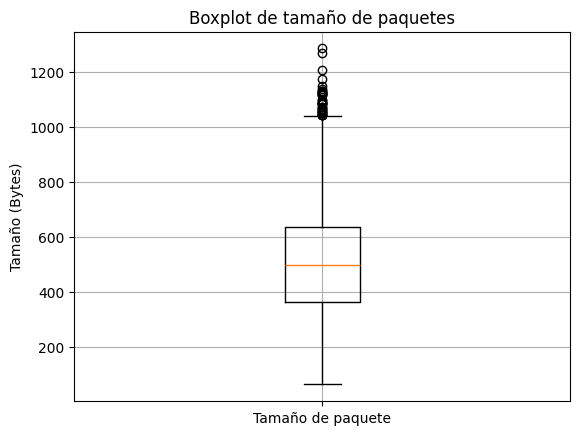

In [119]:
# Tamaño de paquete
data = df['packet_size'][:]

# Crear el boxplot
plt.boxplot(data)
plt.title('Boxplot de tamaño de paquetes')
plt.ylabel('Tamaño (Bytes)')
plt.xticks([1], ['Tamaño de paquete'])  # Etiqueta del eje X
plt.grid(True)
plt.show()

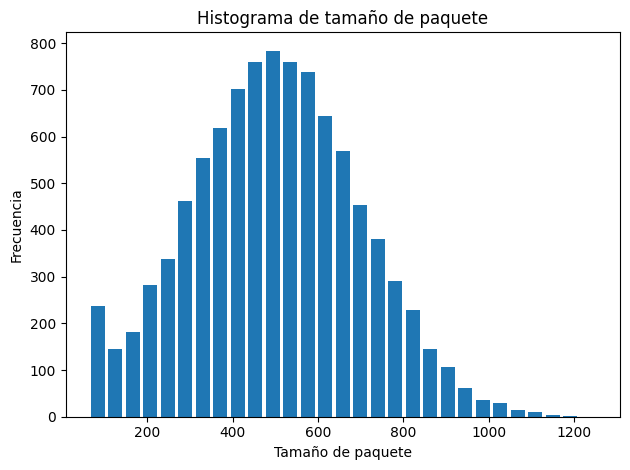

In [120]:
duracion=df.packet_size[:]

minimo_duracion=min(duracion)
maximo_duracion=max(duracion)

cantidad_datos_duration=len(duracion)
cantidad_intervalos_duration = round((maximo_duracion-minimo_duracion)/30)

intervalos_duration=[ punto for punto in range(int(minimo_duracion), int(maximo_duracion), int(cantidad_intervalos_duration) ) ]

plt.hist(duracion, intervalos_duration, histtype='bar', rwidth=0.8) #
plt.title('Histograma de tamaño de paquete')
plt.ylabel('Frecuencia')
plt.xlabel('Tamaño de paquete')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

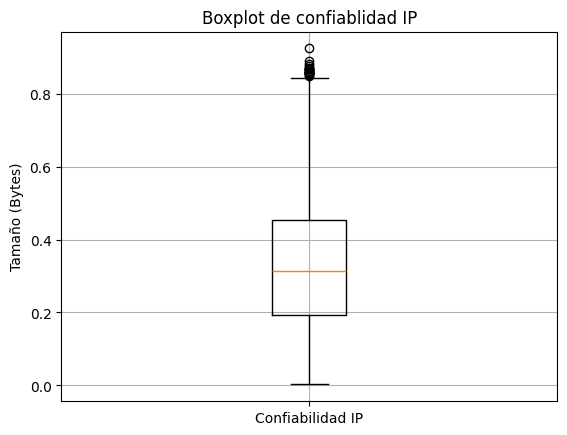

In [121]:
# Confiabilidad IP
data = df['ip_reputation_score'][:]

# Crear el boxplot
plt.boxplot(data)
plt.title('Boxplot de confiablidad IP')
plt.ylabel('Tamaño (Bytes)')
plt.xticks([1], ['Confiabilidad IP'])  # Etiqueta del eje X
plt.grid(True)
plt.show()

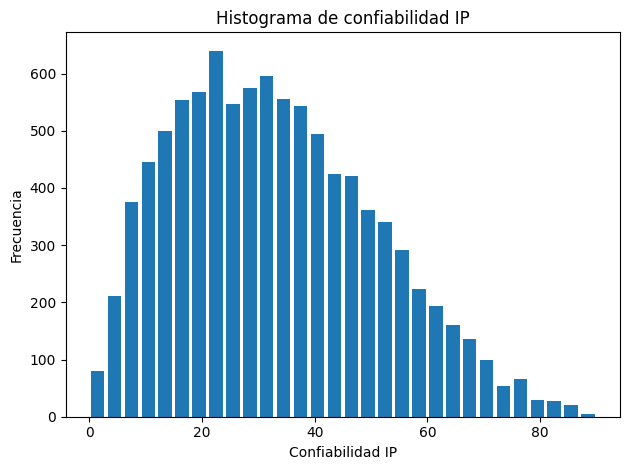

In [122]:
duracion=df.ip_reputation_score[:]*100

minimo_duracion=min(duracion)
maximo_duracion=max(duracion)

cantidad_datos_duration=len(duracion)
cantidad_intervalos_duration = round((maximo_duracion-minimo_duracion)/30)

intervalos_duration=[ punto for punto in range(int(minimo_duracion), int(maximo_duracion), int(cantidad_intervalos_duration) ) ]

plt.hist(duracion, intervalos_duration, histtype='bar', rwidth=0.8) #
plt.title('Histograma de confiabilidad IP')
plt.ylabel('Frecuencia')
plt.xlabel('Confiabilidad IP')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

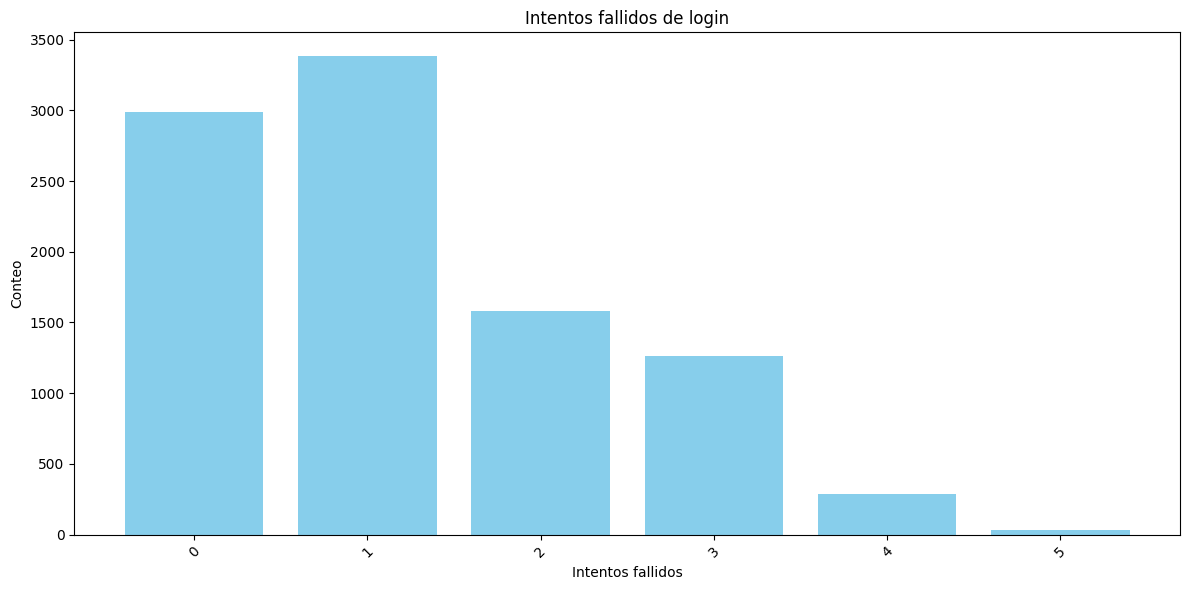

In [123]:
# Intentos fallidos de login
plt.figure(figsize=(12, 6))
plt.bar(df.failed_logins.unique(), df.failed_logins.value_counts(), color='skyblue')
plt.xticks(rotation = 45)
plt.xlabel('Intentos fallidos')
plt.ylabel('Conteo')
plt.title('Intentos fallidos de login')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

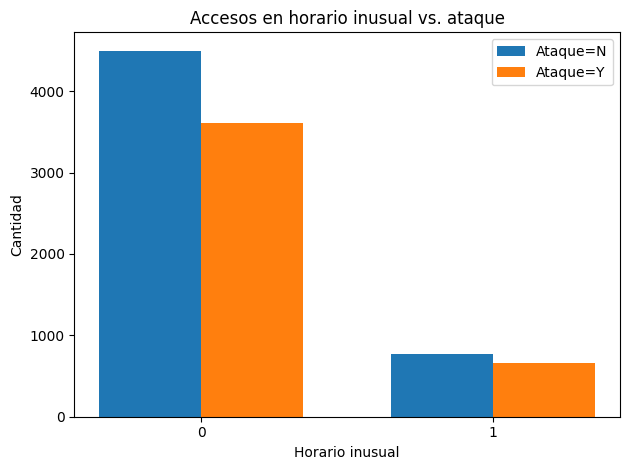

In [124]:
# Horario inusual
cross_tab = pd.crosstab(df['unusual_time_access'], df['attack'])

# Preparar posiciones para las barras
labels = cross_tab.index.astype(str)  # 0 o 1
attack_values = cross_tab.columns  # 0 y 1 (sin ataque / con ataque)
x = np.arange(len(labels))  # posiciones en el eje X
width = 0.35  # ancho de las barras

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots()
for i, col in enumerate(attack_values):
    ax.bar(x + i * width, cross_tab[col], width, label=f'Ataque={col}')

# Etiquetas y leyenda
ax.set_xlabel('Horario inusual')
ax.set_ylabel('Cantidad')
ax.set_title('Accesos en horario inusual vs. ataque')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

                           ID  login_attempts  duration  packet_size  \
ID                   1.000000        0.009711 -0.000189    -0.002101   
login_attempts       0.009711        1.000000  0.008528     0.001283   
duration            -0.000189        0.008528  1.000000     0.021650   
packet_size         -0.002101        0.001283  0.021650     1.000000   
ip_reputation_score  0.006095       -0.002912 -0.005077     0.002320   
failed_logins        0.003817       -0.014558  0.019375    -0.011676   
unusual_time_access -0.000094        0.008732  0.012930    -0.001255   

                     ip_reputation_score  failed_logins  unusual_time_access  
ID                              0.006095       0.003817            -0.000094  
login_attempts                 -0.002912      -0.014558             0.008732  
duration                       -0.005077       0.019375             0.012930  
packet_size                     0.002320      -0.011676            -0.001255  
ip_reputation_score         

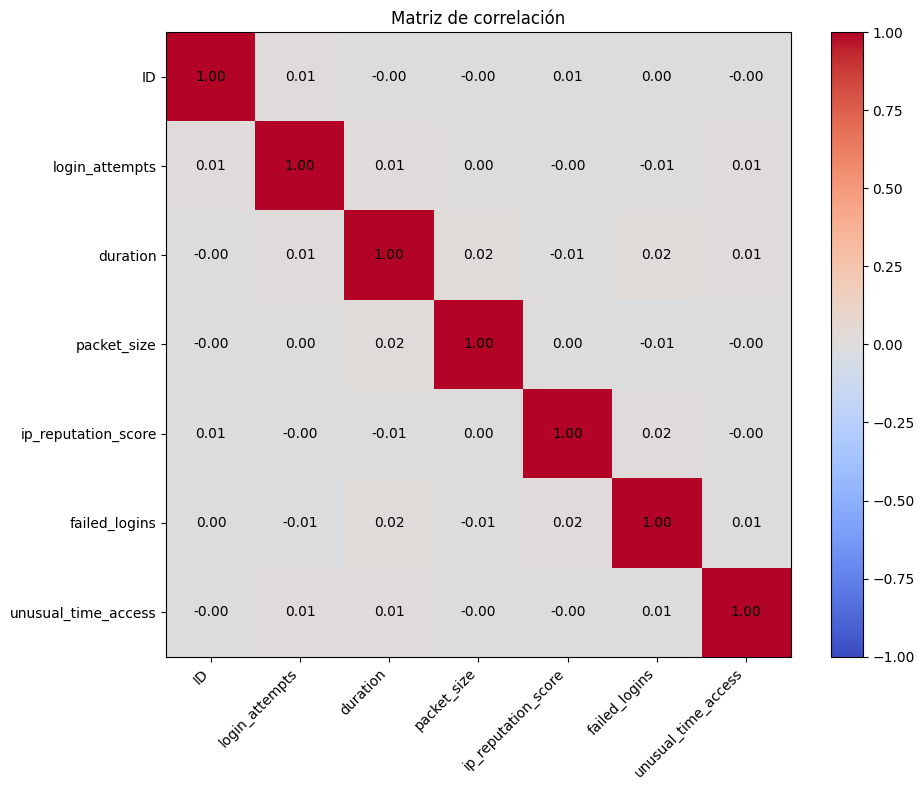

In [125]:
# Matriz de correlación numérica
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar la matriz como imagen
cax = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Agregar etiquetas de los ejes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Mostrar los valores dentro de cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        ax.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')

# Título y colorbar
plt.title("Matriz de correlación")
fig.colorbar(cax)
plt.tight_layout()
plt.show()

## **EJERCICIO 2**

In [126]:
#Importación de paquetes necesarios para el inciso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Lectura y análisis del Dataset
df1 = pd.read_csv('str_1.csv', delimiter=';')
df2 = pd.read_csv('str_2.csv', delimiter=';')

In [128]:
#Concatenamos los dataframes
df = pd.concat([df1, df2], ignore_index=True)

df_crudo = df

In [129]:
# Eliminamos la columna ID para trabajar de una mejor manera
df.drop('ID',axis=1, inplace=True)

In [130]:
#Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   protocol             9537 non-null   object 
 1   browser_type         9537 non-null   object 
 2   login_attempts       9409 non-null   float64
 3   duration             9537 non-null   float64
 4   packet_size          9537 non-null   int64  
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   unusual_time_access  9537 non-null   int64  
 9   attack               9537 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 745.2+ KB


In [131]:
df.head()

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [132]:
df.describe()

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,unusual_time_access
count,9409.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,4.029971,792.745312,500.430639,0.331338,1.517773,0.149942
std,1.962595,786.560144,198.379364,0.177175,1.033988,0.357034
min,1.000000,0.500000,64.000000,0.002497,0.000000,0.000000
25%,3.000000,231.953006,365.000000,0.191946,1.000000,0.000000
50%,4.000000,556.277457,499.000000,0.314778,1.000000,0.000000
75%,5.000000,1105.380602,635.000000,0.453388,2.000000,0.000000
max,13.000000,7190.392213,1285.000000,0.924299,5.000000,1.000000


In [133]:
#Contamos los valores faltantes por columna
df.isnull().sum()

protocol                  0
browser_type              0
login_attempts          128
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64

In [134]:
df[pd.isnull(df.login_attempts)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
78,UDP,Chrome,NaN,195.410180,518,AES,0.447209,0,0,Y
97,TCP,Firefox,NaN,33.652804,552,AES,0.311972,0,0,N
126,TCP,Firefox,NaN,183.719758,301,AES,0.263931,2,0,N
132,TCP,Chrome,NaN,102.388924,287,NaN,0.063839,1,0,Y
155,TCP,Edge,NaN,72.910813,357,DES,0.199537,2,0,Y
...,...,...,...,...,...,...,...,...,...,...
9020,TCP,Edge,NaN,640.488738,537,DES,0.674310,3,0,Y
9021,UDP,Edge,NaN,1456.765115,821,AES,0.427167,1,1,N
9044,TCP,Firefox,NaN,22.106746,439,AES,0.809237,2,0,Y
9164,TCP,Unknown,NaN,898.844146,687,NaN,0.137867,0,0,N


In [135]:
df[pd.notnull(df.login_attempts)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N
...,...,...,...,...,...,...,...,...,...,...
9532,ICMP,Chrome,3.0,226.049889,194,AES,0.517737,3,0,Y
9533,TCP,Chrome,3.0,182.848475,380,NaN,0.408485,0,0,N
9534,TCP,Firefox,5.0,35.170248,664,AES,0.359200,1,0,N
9535,TCP,Chrome,4.0,86.664703,406,AES,0.537417,1,1,N


In [136]:
df[pd.isnull(df.encryption_used)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
8,TCP,Chrome,2.0,542.558895,406,NaN,0.294580,0,1,N
9,UDP,Chrome,6.0,531.944107,608,NaN,0.424117,1,0,N
12,TCP,Safari,2.0,186.147638,548,NaN,0.406899,2,1,N
14,TCP,Chrome,3.0,77.849952,155,NaN,0.352476,3,0,Y
17,UDP,Firefox,1.0,87.641002,562,NaN,0.136729,2,0,N
...,...,...,...,...,...,...,...,...,...,...
9516,TCP,Chrome,4.0,199.992299,869,NaN,0.574007,1,0,N
9529,TCP,Chrome,1.0,2487.078455,469,NaN,0.497153,0,0,N
9530,UDP,Chrome,5.0,1037.597568,661,NaN,0.613622,3,0,Y
9533,TCP,Chrome,3.0,182.848475,380,NaN,0.408485,0,0,N


In [137]:
df[pd.notnull(df.encryption_used)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N
...,...,...,...,...,...,...,...,...,...,...
9528,TCP,Edge,7.0,50.518476,535,DES,0.767659,1,1,Y
9531,TCP,Chrome,7.0,315.151758,746,DES,0.190059,3,0,Y
9532,ICMP,Chrome,3.0,226.049889,194,AES,0.517737,3,0,Y
9534,TCP,Firefox,5.0,35.170248,664,AES,0.359200,1,0,N


In [138]:
# Análisis de variables con faltas
print("\nValores únicos por variable con faltas:\n")
for col in ['encryption_used', 'login_attempts']:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False))


Valores únicos por variable con faltas:


Columna: encryption_used
encryption_used
AES    4706
DES    2865
NaN    1966
Name: count, dtype: int64

Columna: login_attempts
login_attempts
3.0     1824
4.0     1821
5.0     1588
2.0     1342
6.0      947
1.0      859
7.0      562
8.0      264
NaN      128
9.0      122
10.0      45
11.0      22
12.0       8
13.0       5
Name: count, dtype: int64


In [139]:
# Limpieza de valores faltantes

# Imputar login_attempts con la media
df.loc[pd.isnull(df.login_attempts), 'login_attempts'] = df[pd.notnull(df.login_attempts)].login_attempts.median()

In [140]:
# Imputar encryption_used con la categoría 'Faltante'
df.loc[pd.isnull(df['encryption_used']), 'encryption_used'] = 'Faltante'

In [141]:
# Confirmar que ya no quedan valores faltantes
print("\nValores faltantes después de la imputación:\n")
df.isnull().sum()


Valores faltantes después de la imputación:



protocol               0
browser_type           0
login_attempts         0
duration               0
packet_size            0
encryption_used        0
ip_reputation_score    0
failed_logins          0
unusual_time_access    0
attack                 0
dtype: int64

<Axes: >

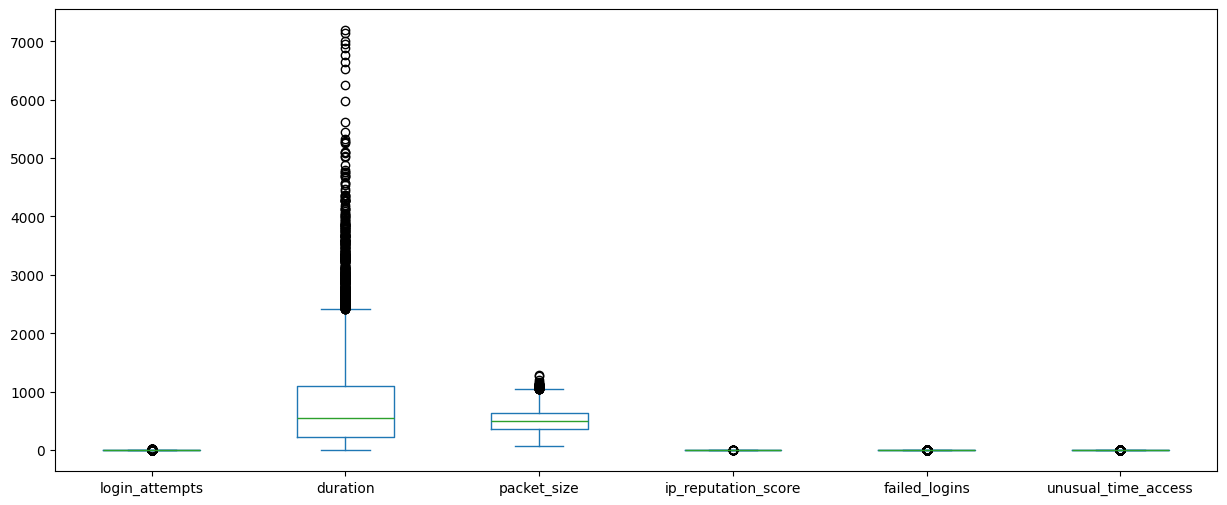

In [142]:
## Boxplot para visualizar valores atípicos
# Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,6))
df.plot(kind='box', ax=ax)

#df[['login_attempts', 'ip_reputation_score', 'failed_logins']].plot(kind='box', ax=ax)

In [143]:
# Calculamos la matriz de correlación absoluta
corr = df.corr(numeric_only=True).abs()

# Calculamos un vector con las medias de cada columna
column_mean = corr.mean(axis=1)

column_mean

login_attempts         0.172635
duration               0.177916
packet_size            0.173034
ip_reputation_score    0.171507
failed_logins          0.177877
unusual_time_access    0.172026
dtype: float64

In [144]:
corr

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,unusual_time_access
login_attempts,1.000000,0.008463,0.001300,0.002887,0.014464,0.008696
duration,0.008463,1.000000,0.021650,0.005077,0.019375,0.012930
packet_size,0.001300,0.021650,1.000000,0.002320,0.011676,0.001255
ip_reputation_score,0.002887,0.005077,0.002320,1.000000,0.015613,0.003146
failed_logins,0.014464,0.019375,0.011676,0.015613,1.000000,0.006131
unusual_time_access,0.008696,0.012930,0.001255,0.003146,0.006131,1.000000


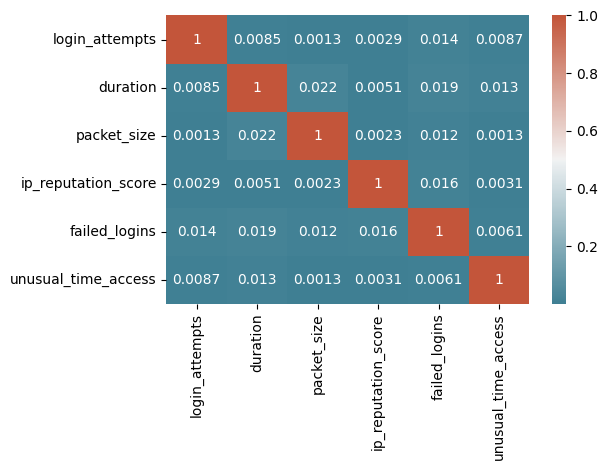

In [145]:
# Visualizamos la matriz de correlación
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()

In [146]:
# Calculo de las correlaciones de las columnas dado un umbral
umbral = 0.70
variables = corr.columns

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        if corr.iloc[i, j] > umbral:
            print(f"La variable '{variables[i]}' está altamente correlacionada con '{variables[j]}'")
            if column_mean[variables[i]] > column_mean[variables[j]]:
                print(f"Se recomienda eliminar: '{variables[i]}'")
            else:
                print(f"Se recomienda eliminar: '{variables[j]}'")

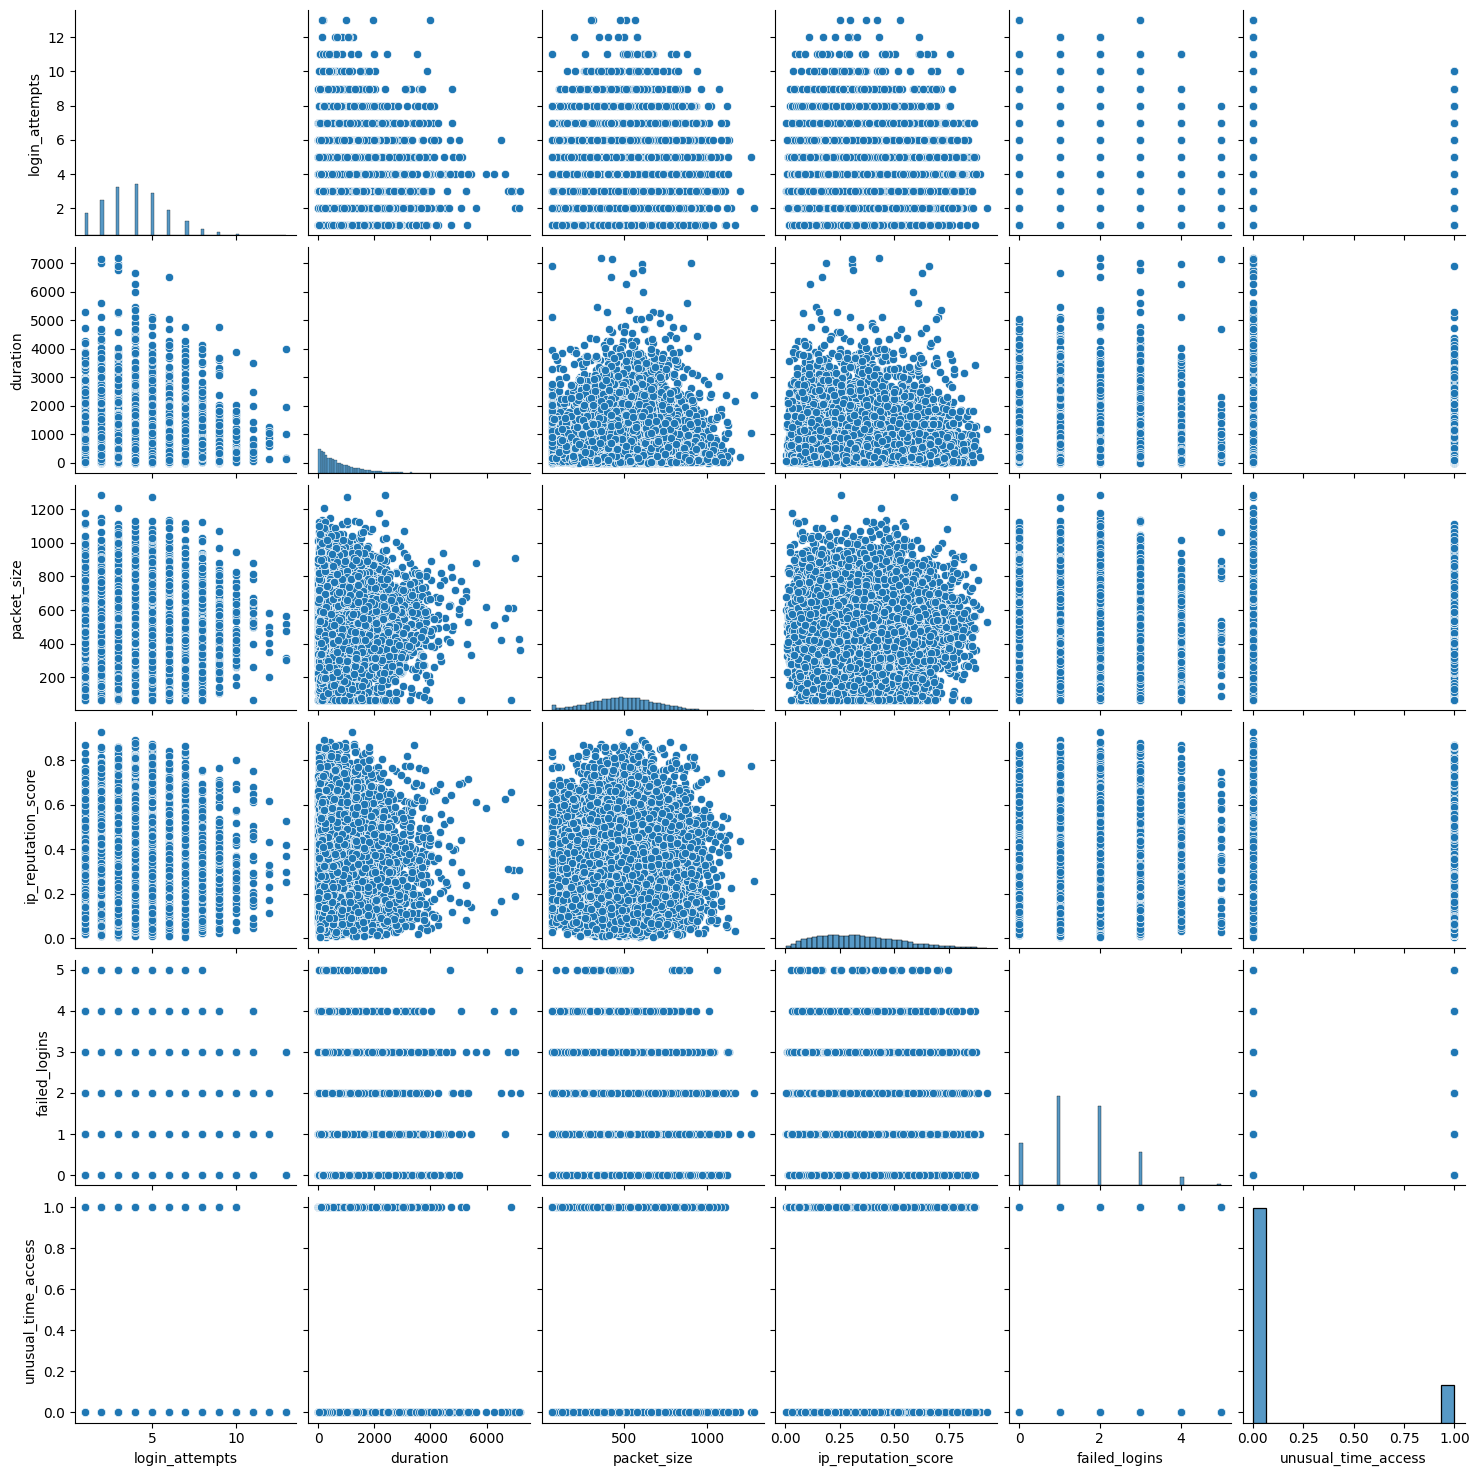

In [147]:
# esto está de adorno, sirve para ver de otra manera la correlación entre variables numéricas
sns.pairplot(df)

In [148]:
## Aplicacion de la codificacion One-Hot a las variables categoricas nominales

df = pd.get_dummies(df, columns=['protocol', 'browser_type'], dtype=int)

df = pd.get_dummies(df, columns=['encryption_used', 'unusual_time_access'], dtype=int)

for attack in df['attack']:
    print(attack, type(attack))

Y <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class 'str'>
N <class 'str'>
N <class 'str'>
Y <class 'str'>
Y <class 'str'>
Y <class 'str'>
N <class 'str'>
Y <class

In [149]:
df['attack'] = df['attack'].map({'Y': 1, 'N': 0})

In [150]:
# Importar el paquete imblearn
from imblearn.over_sampling import RandomOverSampler

In [151]:
# Generar un nuevos conjunto de datos balanceado por Over-sampling
# Definimos la estrategia de Oversampling, la clase minoritaria tendrá la misma cantidad que la mayoritaria.
oversample = RandomOverSampler(sampling_strategy='minority')

In [152]:
df.head()

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,attack,protocol_ICMP,protocol_TCP,protocol_UDP,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown,encryption_used_AES,encryption_used_DES,encryption_used_Faltante,unusual_time_access_0,unusual_time_access_1
0,4.0,492.983263,599,0.606818,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
1,3.0,1557.996461,472,0.301569,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
2,3.0,75.044262,629,0.739164,2,1,0,1,0,1,0,0,0,0,0,1,0,1,0
3,4.0,601.248835,804,0.123267,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
4,5.0,532.540888,453,0.054874,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [153]:
for i in range(5):
    print(df['attack'][i])

1
0
1
1
0


In [154]:
attack = df['attack']

In [155]:
for i in range(5):
    print(attack[i])

1
0
1
1
0


In [156]:
df, attack = oversample.fit_resample(df, attack)

<Axes: xlabel='attack', ylabel='count'>

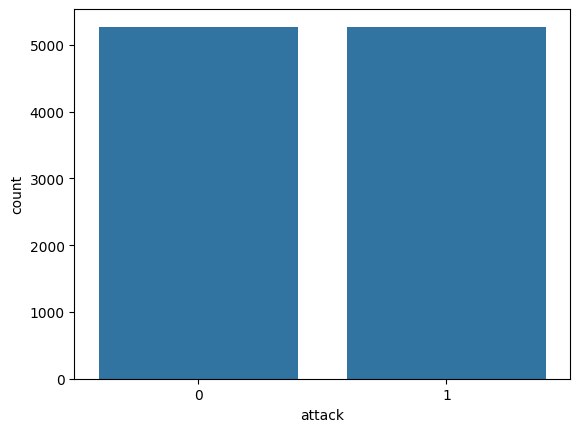

In [157]:
sns.countplot(x=attack)

In [158]:
# Selección de variables numéricas
num_cols = ['login_attempts', 'duration', 'packet_size', 'ip_reputation_score', 'failed_logins']

# Filtramos los datos
data_numeric = df[num_cols]

In [159]:
# Calculamos la media y desviación estándar
means = data_numeric.mean()
stds = data_numeric.std()

# Aplicamos la normalización Z-score
data_scaled = (data_numeric - means) / stds

# Reemplazamos en el DataFrame original
df_scaled = df.copy()
df_scaled[num_cols] = data_scaled

## **EJERCICIO 3**

In [160]:
# Importamos las lbrerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Style

In [161]:
# Lectura con pandas de los archivos CSV 
df_1 = pd.read_csv('str_1.csv', delimiter=';')
df_2 = pd.read_csv('str_2.csv', delimiter=';')

df = pd.concat([df_1, df_2], ignore_index=True)

In [162]:
# Observamos los primeros registros del dataframe
df.head()

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [163]:
# Eliminamos la columna ID
df.drop('ID', axis=1, inplace=True)

In [164]:
# Verificamos que se elimino la columna ID
df.head()

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


## VALORES ERRÓNEOS Y/O FALTANTES

In [165]:
# Observamos los valores faltantes
df.isnull().sum()

protocol                  0
browser_type              0
login_attempts          128
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64

In [166]:
# Asignar a los valores faltantes de intentos de login la mediana ya que son numeros naturales
df.fillna({'login_attempts': df['login_attempts'].median()}, inplace=True)

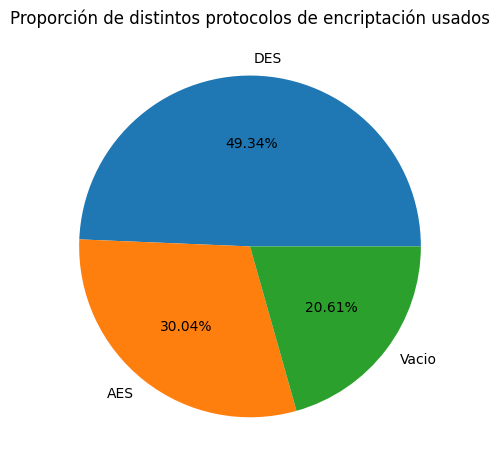

In [167]:
# Protocolo de encriptación
df_encryption_used = pd.DataFrame(df['encryption_used'])
df_encryption_used.fillna('Vacio', inplace=True)

plt.pie(df_encryption_used['encryption_used'].value_counts(), labels=df_encryption_used['encryption_used'].unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos protocolos de encriptación usados')

plt.tight_layout()
plt.show()

In [168]:
# Para los datos faltantes del protocolo de encriptación
# Obtener distribución original (sin NaN)
dist = df['encryption_used'].value_counts(normalize=True)

# Generar valores aleatorios con esa distribución
missing_count = df['encryption_used'].isna().sum()
imputed_values = np.random.choice(dist.index, size=missing_count, p=dist.values)

# Reemplazar NaNs con los valores generados
df.loc[df['encryption_used'].isna(), 'encryption_used'] = imputed_values

# Si la variable tiene correlación con otras podrías entrenar un modelo de clasificación

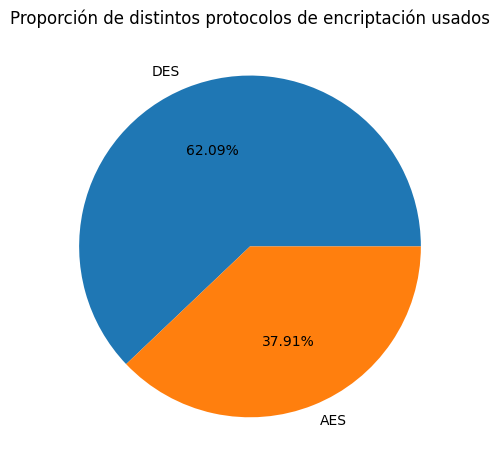

In [169]:
# Protocolo de encriptación
plt.pie(df['encryption_used'].value_counts(), labels=df['encryption_used'].unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos protocolos de encriptación usados')

plt.tight_layout()
plt.show()

In [170]:
# Verificamos los valores faltantes
df.isnull().sum()

protocol               0
browser_type           0
login_attempts         0
duration               0
packet_size            0
encryption_used        0
ip_reputation_score    0
failed_logins          0
unusual_time_access    0
attack                 0
dtype: int64

## VALORES ATÍPICOS

<Axes: >

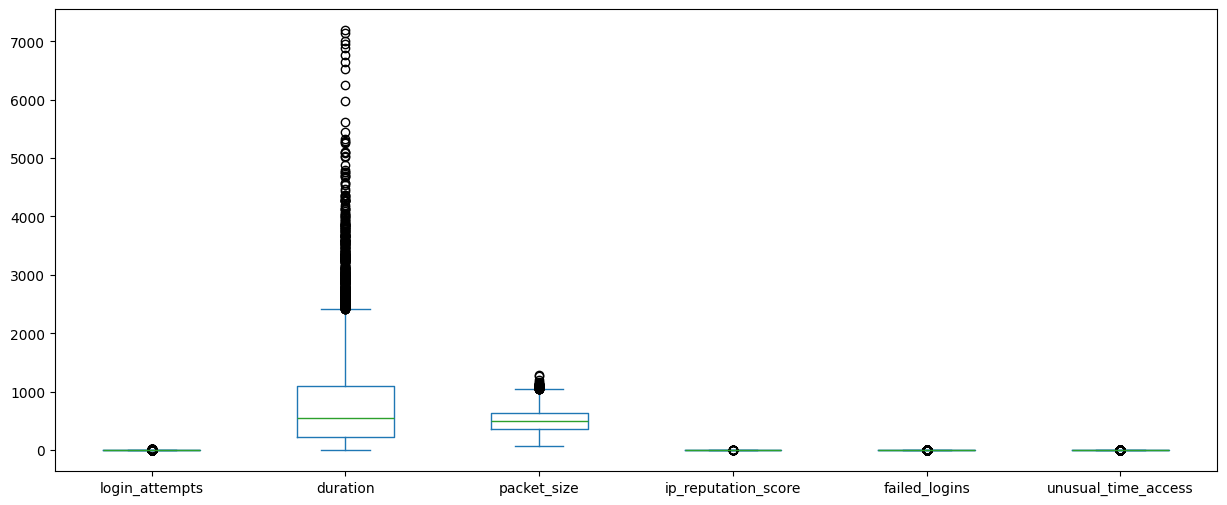

In [171]:
# Boxplot para visualizar valores atípicos
# Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,6))
df.plot(kind='box', ax=ax)

## PROCESAMIENTO DE VARIABLES CATEGÓRICAS

In [172]:
df = pd.get_dummies(df, columns=['protocol','browser_type'], dtype=int)
df = pd.get_dummies(df, columns=['encryption_used', 'unusual_time_access'], dtype=int)

In [173]:
df.head()

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,attack,protocol_ICMP,protocol_TCP,protocol_UDP,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown,encryption_used_AES,encryption_used_DES,unusual_time_access_0,unusual_time_access_1
0,4.0,492.983263,599,0.606818,1,Y,0,1,0,0,1,0,0,0,0,1,1,0
1,3.0,1557.996461,472,0.301569,0,N,0,1,0,0,0,1,0,0,0,1,1,0
2,3.0,75.044262,629,0.739164,2,Y,0,1,0,1,0,0,0,0,0,1,1,0
3,4.0,601.248835,804,0.123267,0,Y,0,0,1,0,0,0,0,1,0,1,1,0
4,5.0,532.540888,453,0.054874,1,N,0,1,0,0,0,1,0,0,1,0,1,0


Los valores de la variable categórica que representa nuestras etiquetas son Strings 'Y' y 'N' representando fue atacado o no. Cambiamos estos resultados por 1 para la etiqueta 'Y' y 0 para la etiqueta 'N'.

In [174]:
# Visualizar los valores de la columna (unique).
df['attack'].unique()

array(['Y', 'N'], dtype=object)

In [175]:
# Cambiar los valores Y y N de la columna "attack" por 1 y 0
df['attack'] = df['attack'].map({'Y':1,'N':0})

In [176]:
# Visualizar los valores de la columna (unique).
df['attack'].unique()

array([1, 0])

## BALANCE DEL CONJUNTO DE DATOS

In [177]:
# Visualizar el balance del dataset
df['attack'].value_counts()

attack
0    5273
1    4264
Name: count, dtype: int64

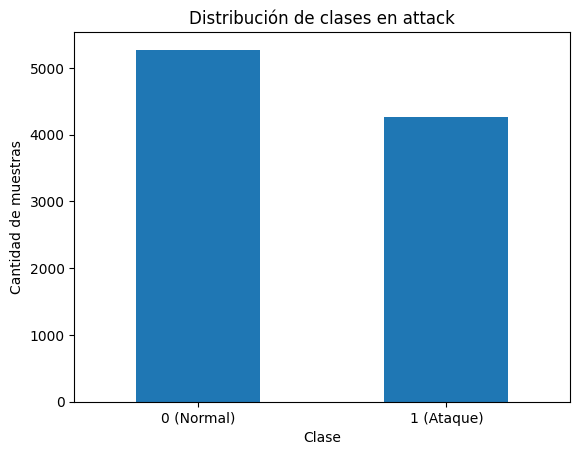

In [178]:
# Visualización grafica
df['attack'].value_counts().plot(kind='bar')
plt.title('Distribución de clases en attack')
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.xticks([0, 1], ['0 (Normal)', '1 (Ataque)'], rotation=0)
plt.show()

In [179]:
# Importamos la libreira necesaria
from imblearn.over_sampling import SMOTE

In [180]:
# Nos guradamos las etiquetas en un vector auxiliar
attack = df['attack']

# Aplicamos el over_sampling de los datos

df, attack = SMOTE().fit_resample(df, attack)

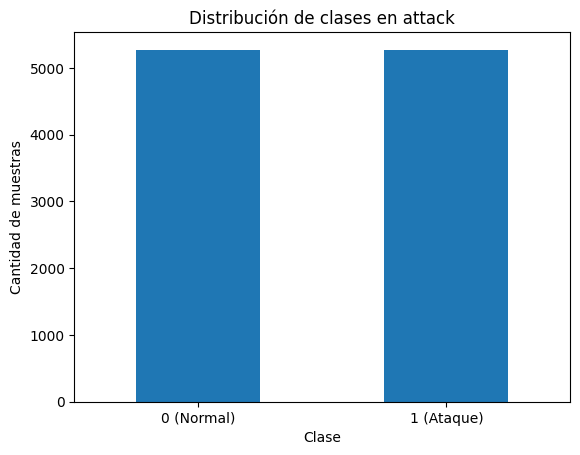

In [181]:
# Visualización grafica
df['attack'].value_counts().plot(kind='bar')
plt.title('Distribución de clases en attack')
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.xticks([0, 1], ['0 (Normal)', '1 (Ataque)'], rotation=0)
plt.show()

In [182]:
df['attack'].value_counts()

attack
1    5273
0    5273
Name: count, dtype: int64

Otro

In [183]:
# Importar el paquete imblearn
from imblearn.over_sampling import RandomOverSampler

In [184]:
# Separar features (X) y la variable objetivo (y)
X = df.drop('attack', axis=1)
y = df['attack']

<Axes: xlabel='attack', ylabel='count'>

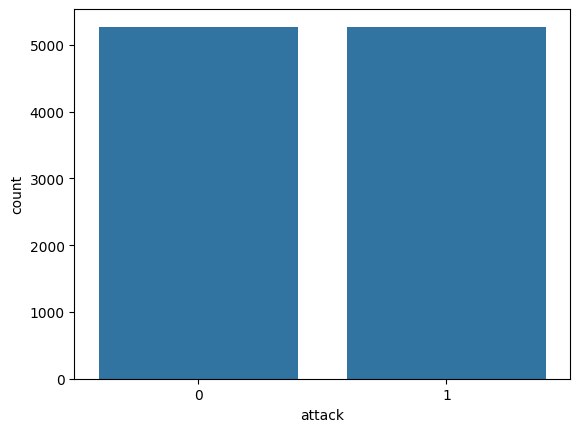

In [185]:
# Visualizar el balance del dataset
sns.countplot(x=y)

In [186]:
# Generar un nuevos conjunto de datos balanceado por Over-sampling
# Definimos la estrategia de Oversampling, la clase minoritaria tendrá la misma cantidad que la mayoritaria.
oversample = RandomOverSampler(sampling_strategy='minority')

In [187]:
# Generamos el nuevo dataset balanceado
X_over, y_over = oversample.fit_resample(X, y)

<Axes: xlabel='attack', ylabel='count'>

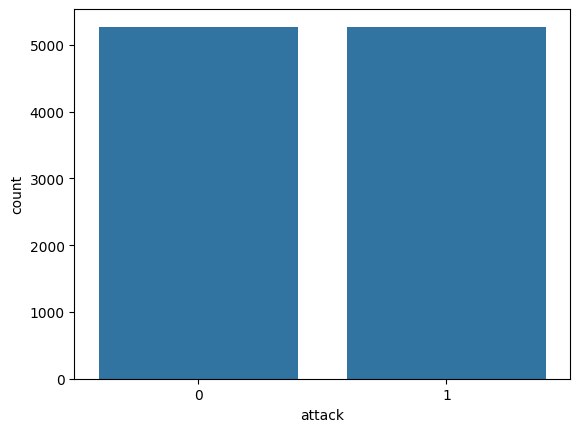

In [188]:
# Visualizar el balance del dataset generado
sns.countplot(x=y_over)

## NORMALIZACIÓN DEL CONJUNTO DE DATOS

In [189]:
# Selección de variables numéricas
num_cols = ['login_attempts', 'duration', 'packet_size', 'ip_reputation_score', 'failed_logins']


# Filtramos los datos
data_numeric = df[num_cols]


# Calculamos la media y desviación estándar
means = data_numeric.mean()
stds = data_numeric.std()


# Aplicamos la normalización Z-score
data_scaled = (data_numeric - means) / stds


# Reemplazamos en el DataFrame original
# df_scaled = df.copy()
# df_scaled[num_cols] = data_scaled
df[num_cols] = data_scaled

# **Modelado**

In [190]:
# Carga de los paquetes necesarios
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [191]:
# Visualizar las columnas del dataframe
df.columns

Index(['login_attempts', 'duration', 'packet_size', 'ip_reputation_score',
       'failed_logins', 'attack', 'protocol_ICMP', 'protocol_TCP',
       'protocol_UDP', 'browser_type_Chrome', 'browser_type_Edge',
       'browser_type_Firefox', 'browser_type_Safari', 'browser_type_Unknown',
       'encryption_used_AES', 'encryption_used_DES', 'unusual_time_access_0',
       'unusual_time_access_1'],
      dtype='object')

In [192]:
# Seleccionar las columnas del dataset "df" que corresponden a las entradas del modelo y la salida esperada.
X = df[['login_attempts', 'duration', 'packet_size', 'ip_reputation_score',
       'failed_logins', 'attack', 'protocol_ICMP', 'protocol_TCP',
       'protocol_UDP', 'browser_type_Chrome', 'browser_type_Edge',
       'browser_type_Firefox', 'browser_type_Safari', 'browser_type_Unknown',
       'encryption_used_AES', 'encryption_used_DES', 'unusual_time_access_0',
       'unusual_time_access_1']]
y = df['attack'] 

# **Modelos de clasificación**

In [193]:
X.head()

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,attack,protocol_ICMP,protocol_TCP,protocol_UDP,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown,encryption_used_AES,encryption_used_DES,unusual_time_access_0,unusual_time_access_1
0,-0.051036,-0.382165,0.499911,1.531926,-0.506108,1,0,1,0,0,1,0,0,0,0,1,1,0
1,-0.561550,0.969731,-0.141163,-0.194574,-1.483119,0,0,1,0,0,0,1,0,0,0,1,1,0
2,-0.561550,-0.912685,0.651346,2.280481,0.470904,1,0,1,0,1,0,0,0,0,0,1,1,0
3,-0.051036,-0.244736,1.534715,-1.203055,-1.483119,1,0,0,1,0,0,0,0,1,0,1,1,0
4,0.459478,-0.331952,-0.237072,-1.589890,-0.506108,0,0,1,0,0,0,1,0,0,1,0,1,0


## Partición del conjunto de datos

In [194]:
# Separar el conjunto de datos en una particion para entrenamiento y una para test con el 30% del conjunto.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [195]:
# Visualizar el resultado de la función (shape)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(10546, 18) (9491, 18) (1055, 18)
(10546,) (9491,) (1055,)


## Árbol de Decisión

In [207]:
# Instanciar un Arbol de Decisión
model_Tree1 = DecisionTreeClassifier(max_features=1, max_depth=3)

model_Tree2 = DecisionTreeClassifier(max_features=3, max_depth=3)

model_Tree3 = DecisionTreeClassifier(max_features=3, max_depth=6)


# Entrenar el modelo con el conjunto de entrenamiento
model_Tree1.fit(X_train, y_train)
model_Tree2.fit(X_train, y_train)
model_Tree3.fit(X_train, y_train)

# Calculando la precisión para el conjunto de entrenamiento
X_train_prediction1 = model_Tree1.predict(X_train)
X_train_prediction2 = model_Tree2.predict(X_train)
X_train_prediction3 = model_Tree3.predict(X_train)

train_accuracy1 = accuracy_score(X_train_prediction1, y_train)
train_f1_1 = f1_score(X_train_prediction1, y_train)

train_accuracy2 =  accuracy_score(X_train_prediction2, y_train)
train_f1_2 = f1_score(X_train_prediction2, y_train)

train_accuracy3 = accuracy_score(X_train_prediction3, y_train)
train_f1_3 = f1_score(X_train_prediction3, y_train)


print('Accuracy para los datos de entrenamiento, para el primer arbol : ', train_accuracy1)
print('Precision para los datos de entrenamiento, para el primer arbol : ', train_f1_1)

print("-----------------------------")

print('Accuracy para los datos de entrenamiento, para el segundo arbol : ', train_accuracy2)
print('Precision para los datos de entrenamiento, para el segundo arbol : ', train_f1_2)

print("-----------------------------")

print('Accuracy para los datos de entrenamiento, para el tercer arbol : ', train_accuracy3)
print('Precision para los datos de entrenamiento, para el tercer arbol : ', train_f1_3)


Accuracy para los datos de entrenamiento, para el primer arbol :  0.6279633336845433
Precision para los datos de entrenamiento, para el primer arbol :  0.41355256601893375
-----------------------------
Accuracy para los datos de entrenamiento, para el segundo arbol :  0.6114213465388263
Precision para los datos de entrenamiento, para el segundo arbol :  0.3710777626193724
-----------------------------
Accuracy para los datos de entrenamiento, para el tercer arbol :  1.0
Precision para los datos de entrenamiento, para el tercer arbol :  1.0


## Modelo KNN





In [209]:
model_KNN1 = KNeighborsClassifier(n_neighbors=3)
model_KNN2 = KNeighborsClassifier(n_neighbors=4)
model_KNN3 = KNeighborsClassifier(n_neighbors=5)

model_KNN1.fit(X_train, y_train)
model_KNN2.fit(X_train, y_train)
model_KNN3.fit(X_train, y_train)

# Calculando la precisión para el conjunto de entrenamiento
X_train_prediction1 = model_KNN1.predict(X_train)
X_train_prediction2 = model_KNN2.predict(X_train)
X_train_prediction3 = model_KNN3.predict(X_train)

train_accuracy1 = accuracy_score(X_train_prediction1, y_train)
train_f1_1 = f1_score(X_train_prediction1, y_train)
print('Accuracy para los datos de entrenamiento, para el primer KNN : ', train_accuracy1)
print('Puntaje f1 para los datos de entrenamiento, para el primer KNN : ',train_f1_1)

print("-----------------------------")

train_accuracy2 = accuracy_score(X_train_prediction2, y_train)
train_f1_2 = f1_score(X_train_prediction2, y_train)
print('Accuracy para los datos de entrenamiento, para el segundo KNN : ', train_accuracy2)
print('Puntaje f1 para los datos de entrenamiento, para el segundo KNN : ', train_f1_2)

print("-----------------------------")

train_accuracy3 = accuracy_score(X_train_prediction3, y_train)
train_f1_3 = f1_score(X_train_prediction3, y_train)
print('Accuracy para los datos de entrenamiento, para el tercer KNN : ', train_accuracy3)
print('Puntaje f1 para los datos de entrenamiento, para el tercer KNN : ', train_f1_3)


Accuracy para los datos de entrenamiento, para el primer KNN :  0.9909387841112633
Puntaje f1 para los datos de entrenamiento, para el primer KNN :  0.990932096161957
-----------------------------
Accuracy para los datos de entrenamiento, para el segundo KNN :  0.979243493836266
Puntaje f1 para los datos de entrenamiento, para el segundo KNN :  0.9789507426007052
-----------------------------
Accuracy para los datos de entrenamiento, para el tercer KNN :  0.9888315246022548
Puntaje f1 para los datos de entrenamiento, para el tercer KNN :  0.9887854422344478


## **EJERCICIO 4**

In [249]:
# Librerías necesarias para el ejercicio 4
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [250]:
# Separamos en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['attack'])
y = df['attack']

In [251]:
# Separar el conjunto de datos en una particion para entrenamiento y una para test con el 30% del conjunto.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [252]:
# Visualizar el resultado de la función (shape)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(10546, 17) (7382, 17) (3164, 17)
(10546,) (7382,) (3164,)


In [253]:
# Búsqueda manual de hiperparámetros
mejor_modelo = None
mejor_score = 0
mejores_parametros = {}

for n_estimators in [100, 150]:
    for max_depth in [3, 5, 10]:
        for max_features in [3, 5]:
            modelo = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                max_features=max_features,
                random_state=42
            )
            modelo.fit(X_train, y_train)
            score = modelo.score(X_test, y_test)
            if score > mejor_score:
                mejor_score = score
                mejor_modelo = modelo
                mejores_parametros = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'max_features': max_features
                }

print("Mejores hiperparámetros encontrados:", mejores_parametros)
print("Mejor accuracy obtenido:", mejor_score)

Mejores hiperparámetros encontrados: {'n_estimators': 150, 'max_depth': 10, 'max_features': 5}
Mejor accuracy obtenido: 0.8979140328697851


#### **Bosques Aleatorios**

In [254]:
# Instanciar un Bosque Aleatorio
model_RF = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=3)

In [255]:
# Entrenar el modelo con el conjunto de entrenamiento
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=5)

In [259]:
# Copiamos un árbol
tree_0 = model_RF.estimators_[99]

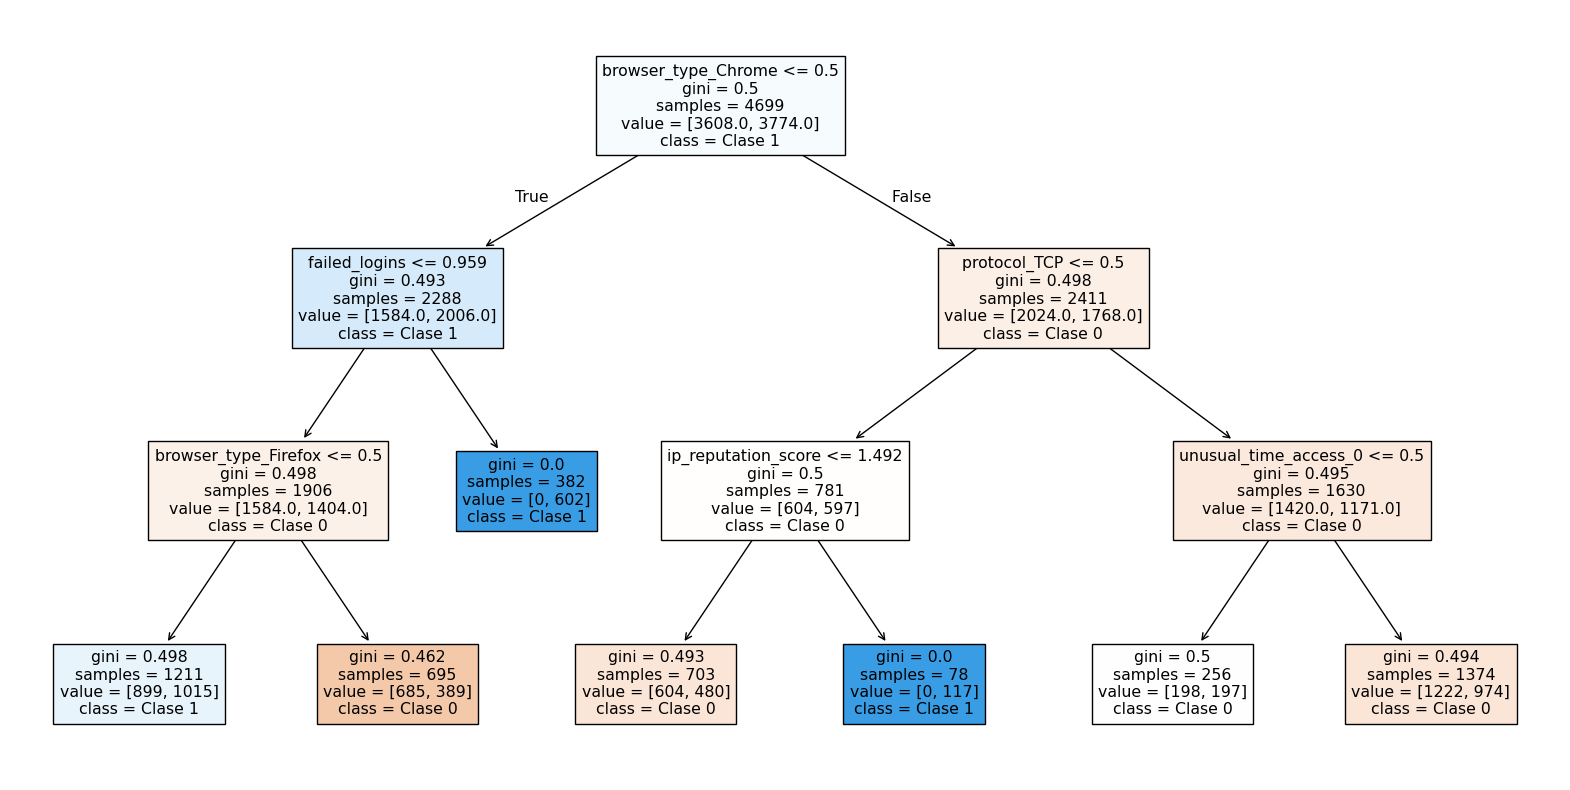

In [260]:
# Visualizamos el árbol
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_0, 
          filled=True, 
          feature_names=X.columns,
          class_names=["Clase 0", "Clase 1"])
plt.show()

In [261]:
# Evaluación del modelo
dt_train_score, dt_test_score = model_RF.score(X_train, y_train), model_RF.score(X_test, y_test)
print(f"Train Score: {dt_train_score}")
print(f"Test Score: {dt_test_score}")

Train Score: 0.8423191547006231
Test Score: 0.8435524652338812


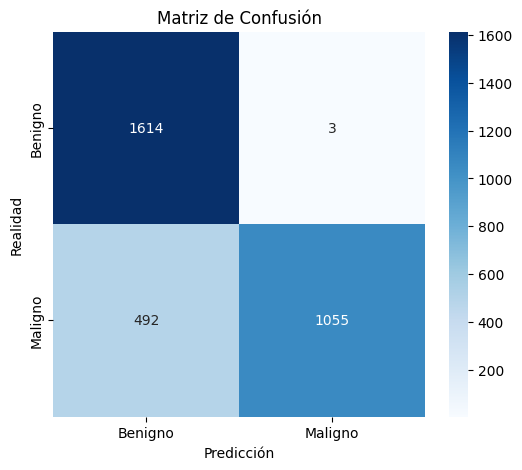

In [262]:
# Matriz de confusión
y_pred_bagging = model_RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_bagging)

# Mostrar la matriz de confusión como un gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [264]:
# Reporte de clasificación (precision, recall, f1-score)
report = classification_report(y_test, y_pred_bagging)
print("\nReporte de clasificación:")
print(report)


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1617
           1       1.00      0.68      0.81      1547

    accuracy                           0.84      3164
   macro avg       0.88      0.84      0.84      3164
weighted avg       0.88      0.84      0.84      3164

